In [1]:
import cv2
import jax
import tensorflow_datasets as tfds
import tqdm
import mediapy
import numpy as np
from octo.model.octo_model import OctoModel

model = OctoModel.load_pretrained("hf://rail-berkeley/octo-base-1.5")

# create RLDS dataset builder
builder = tfds.builder_from_directory(builder_dir='gs://gresearch/robotics/bridge/0.1.0/')
ds = builder.as_dataset(split='train[:1]')

# sample episode + resize to 256x256 (default third-person cam resolution)
episode = next(iter(ds))
steps = list(episode['steps'])
images = [cv2.resize(np.array(step['observation']['image']), (256, 256)) for step in steps]


2024-10-19 14:17:59.592480: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-19 14:17:59.660304: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-19 14:17:59.692944: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/home/jet/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 6 files: 100%|██████████| 6/6 [00:00<00:00, 25191.02it/s]
/home/jet/.local/lib/python3.10/site-packages/

In [1]:
import cv2
import jax
import tensorflow_datasets as tfds
import tqdm
import mediapy
import numpy as np
from octo.model.octo_model import OctoModel

model = OctoModel.load_pretrained("./octo-small-1.5")

2024-10-05 21:53:02.740016: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 21:53:02.768813: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 21:53:02.782418: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/home/jet/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jet/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean

bridge 

Split	Examples
'test'	3,475
'train'	25,460

FeaturesDict({
    'episode_metadata': FeaturesDict({
        'episode_id': Scalar(shape=(), dtype=int32),
        'file_path': string,
        'has_image_0': Scalar(shape=(), dtype=bool),
        'has_image_1': Scalar(shape=(), dtype=bool),
        'has_image_2': Scalar(shape=(), dtype=bool),
        'has_image_3': Scalar(shape=(), dtype=bool),
        'has_language': Scalar(shape=(), dtype=bool),
    }),
    'steps': Dataset({
        'action': Tensor(shape=(7,), dtype=float32),
        'discount': Scalar(shape=(), dtype=float32),
        'is_first': bool,
        'is_last': bool,
        'is_terminal': bool,
        'language_embedding': Tensor(shape=(512,), dtype=float32),
        'language_instruction': string,
        'observation': FeaturesDict({
            'image_0': Image(shape=(256, 256, 3), dtype=uint8),
            'image_1': Image(shape=(256, 256, 3), dtype=uint8),
            'image_2': Image(shape=(256, 256, 3), dtype=uint8),
            'image_3': Image(shape=(256, 256, 3), dtype=uint8),
            'state': Tensor(shape=(7,), dtype=float32),
        }),
        'reward': Scalar(shape=(), dtype=float32),
    }),
})

berkeley_autolab_ur5 

Split	Examples
'test'	104
'train'	896


FeaturesDict({
    'steps': Dataset({
        'action': FeaturesDict({
            'gripper_closedness_action': float32,
            'rotation_delta': Tensor(shape=(3,), dtype=float32, description=Delta change in roll, pitch, yaw.),
            'terminate_episode': float32,
            'world_vector': Tensor(shape=(3,), dtype=float32, description=Delta change in XYZ.),
        }),
        'is_first': bool,
        'is_last': bool,
        'is_terminal': bool,
        'observation': FeaturesDict({
            'hand_image': Image(shape=(480, 640, 3), dtype=uint8),
            'image': Image(shape=(480, 640, 3), dtype=uint8),
            'image_with_depth': Image(shape=(480, 640, 1), dtype=float32),
            'natural_language_embedding': Tensor(shape=(512,), dtype=float32),
            'natural_language_instruction': string,
            'robot_state': Tensor(shape=(15,), dtype=float32, description=Explanation of the robot state can be found at https://sites.google.com/corp/view/berkeley-ur5),
            # [joint0, joint1, joint2, joint3, joint4, joint5, x,y,z, qx,qy,qz,qw, gripper_is_closed, action_blocked]
        }),
        'reward': Scalar(shape=(), dtype=float32),
    }),
})

In [2]:
# create RLDS dataset builder
# builder = tfds.builder_from_directory(builder_dir='gs://gresearch/robotics/bridge/0.1.0/')
builder = tfds.builder_from_directory(builder_dir='gs://gresearch/robotics/berkeley_autolab_ur5/0.1.0/')
ds = builder.as_dataset(split='train[:1]')

# sample episode + resize to 256x256 (default third-person cam resolution)
episode = next(iter(ds))
steps = list(episode['steps'])
images = [cv2.resize(np.array(step['observation']['image']), (256, 256)) for step in steps]
hand_images = [cv2.resize(np.array(step['observation']['hand_image']), (128, 128)) for step in steps]

# extract goal image & language instruction
goal_image = images[-1]
language_instruction = steps[0]['observation']['natural_language_instruction'].numpy().decode()
language_instruction = 'sweep the cloth to the left side of the table'

# visualize episode
print(f'Instruction: {language_instruction}')
mediapy.show_video(images, fps=10)
mediapy.show_video(hand_images, fps=10)

WINDOW_SIZE = 2

# create `task` dict
task = model.create_tasks(goals={"image_primary": goal_image[None]})   # for goal-conditioned
task = model.create_tasks(texts=[language_instruction])                  # for language conditioned

2024-10-19 14:19:20.402440: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Instruction: sweep the cloth to the left side of the table


In [3]:
stat = model.dataset_statistics["bridge_dataset"]["action"]
print(stat.keys())
for key in stat.keys():
    print(type(stat[key]))
    print(key, stat[key])

dict_keys(['mask', 'max', 'mean', 'min', 'std'])
<class 'numpy.ndarray'>
mask [ True  True  True  True  True  True False]
<class 'numpy.ndarray'>
max [0.41691166 0.25864795 0.21218234 3.12220192 1.86181128 6.28047848
 1.        ]
<class 'numpy.ndarray'>
mean [ 2.17586465e-04  1.25082981e-04 -1.71083258e-04 -1.61711389e-04
 -2.52485683e-04  2.51578749e-04  5.87948442e-01]
<class 'numpy.ndarray'>
min [-0.40075102 -0.13874775 -0.225539   -3.20107865 -1.86181128 -6.27907562
  0.        ]
<class 'numpy.ndarray'>
std [0.00963238 0.01350064 0.0125106  0.02814521 0.03028243 0.07585602
 0.48771909]


Octo Evaluation Environments

The `step` and `reset` functions of the Gym environment should return observations with the images, depth images, and/or
proprioceptive information that the model expects as input. Specifically, the returned observations should be dictionaries
of the form:
```
obs = {
    "image_primary": ...,
    "image_wrist": ...,
    ...
    "depth_primary": ...,
    "depth_wrist": ...,
    ...
    "proprio": ...,
}
```

Note that the image keys should be `image_{key}` where `key` is one of the `image_obs_keys` specified in the data loading config used to train the model (typically this is `primary` and/or `wrist`).
If a key is not present in the observation dictionary, the model will substitute it with padding.

Check out the example environments in this folder to help you integrate your own environment!


In [5]:
ee = model.example_batch['observation']

In [4]:
ex = list(model.example_batch['observation'])
for i in ex:
    print()
    print(i)
    print(type(model.example_batch['observation'][i]))
    if isinstance(model.example_batch['observation'][i], np.ndarray):
        print(model.example_batch['observation'][i].shape)
    if isinstance(model.example_batch['observation'][i], dict):
        print(model.example_batch['observation'][i].keys())

'''    
import logging
logging.basicConfig(level=logging.DEBUG)
# run inference loop, this model only uses 3rd person image observations for bridge
# collect predicted and true actions
pred_actions, true_actions = [], []

step = 0
input_images = np.stack(images[step:step+WINDOW_SIZE])[None]
wrist_images = np.stack(hand_images[step:step+WINDOW_SIZE])[None]
input_depths = np.stack(depths[step:step+WINDOW_SIZE])[None]
observation = {
    'image_primary': input_images,
    'image_wrist': wrist_images,
    'timestep_pad_mask': np.full((1, input_images.shape[1]), True, dtype=bool)
}
stat = model.dataset_statistics["berkeley_autolab_ur5"]["action"]

print('\n\n\n\n DEBUGGING \n\n\n\n')
actions = model.sample_actions(observation, task, unnormalization_statistics=stat, rng=jax.random.PRNGKey(0))
print(actions)
'''


image_primary
<class 'numpy.ndarray'>
(1, 2, 256, 256, 3)

image_wrist
<class 'numpy.ndarray'>
(1, 2, 128, 128, 3)

pad_mask_dict
<class 'dict'>
dict_keys(['image_primary', 'image_wrist', 'timestep'])

task_completed
<class 'numpy.ndarray'>
(1, 2, 4)

timestep
<class 'numpy.ndarray'>
(1, 2)

timestep_pad_mask
<class 'numpy.ndarray'>
(1, 2)


'    \nimport logging\nlogging.basicConfig(level=logging.DEBUG)\n# run inference loop, this model only uses 3rd person image observations for bridge\n# collect predicted and true actions\npred_actions, true_actions = [], []\n\nstep = 0\ninput_images = np.stack(images[step:step+WINDOW_SIZE])[None]\nwrist_images = np.stack(hand_images[step:step+WINDOW_SIZE])[None]\ninput_depths = np.stack(depths[step:step+WINDOW_SIZE])[None]\nobservation = {\n    \'image_primary\': input_images,\n    \'image_wrist\': wrist_images,\n    \'timestep_pad_mask\': np.full((1, input_images.shape[1]), True, dtype=bool)\n}\nstat = model.dataset_statistics["berkeley_autolab_ur5"]["action"]\n\nprint(\'\n\n\n\n DEBUGGING \n\n\n\n\')\nactions = model.sample_actions(observation, task, unnormalization_statistics=stat, rng=jax.random.PRNGKey(0))\nprint(actions)\n'

In [5]:
# run inference loop, this model only uses 3rd person image observations for bridge
# collect predicted and true actions
pred_actions, true_actions = [], []
for step in tqdm.trange(len(images) - (WINDOW_SIZE - 1)):
    input_images = np.stack(images[step:step+WINDOW_SIZE])[None]
    observation = {'image_primary': input_images,'timestep_pad_mask': np.full((1, input_images.shape[1]), True, dtype=bool)}
    stat = model.dataset_statistics["bridge_dataset"]["action"]
    # this returns *normalized* actions --> we need to unnormalize using the dataset statistics
    actions = model.sample_actions(observation, task, unnormalization_statistics=stat, rng=jax.random.PRNGKey(0))
    actions = actions[0] # remove batch dimension
    pred_actions.append(actions)
    final_window_step = step + WINDOW_SIZE - 1
    true_actions.append(np.concatenate((steps[final_window_step]['action']['world_vector'],steps[final_window_step]['action']['rotation_delta'],np.array(steps[final_window_step]['action']['open_gripper']).astype(np.float32)[None]), axis=-1))

print('\n\n\n\n DONE \n\n\n\n')

import matplotlib.pyplot as plt

ACTION_DIM_LABELS = ['x', 'y', 'z', 'yaw', 'pitch', 'roll', 'grasp']

# build image strip to show above actions
img_strip = np.concatenate(np.array(images[::3]), axis=1)

# set up plt figure
figure_layout = [
    ['image'] * len(ACTION_DIM_LABELS),
    ACTION_DIM_LABELS
]
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplot_mosaic(figure_layout)
fig.set_size_inches([45, 10])

# plot actions
pred_actions = np.array(pred_actions).squeeze()
true_actions = np.array(true_actions).squeeze()
for action_dim, action_label in enumerate(ACTION_DIM_LABELS):
  # actions have batch, horizon, dim, in this example we just take the first action for simplicity
  axs[action_label].plot(pred_actions[:, 0, action_dim], label='predicted action')
  axs[action_label].plot(true_actions[:, action_dim], label='ground truth')
  axs[action_label].set_title(action_label)
  axs[action_label].set_xlabel('Time in one episode')

axs['image'].imshow(img_strip)
axs['image'].set_xlabel('Time in one episode (subsampled)')
plt.legend()
plt.savefig('action_predictions.png')

  0%|          | 0/70 [00:13<?, ?it/s]


KeyboardInterrupt: 

100%|██████████| 70/70 [01:02<00:00,  1.13it/s]






 DONE 






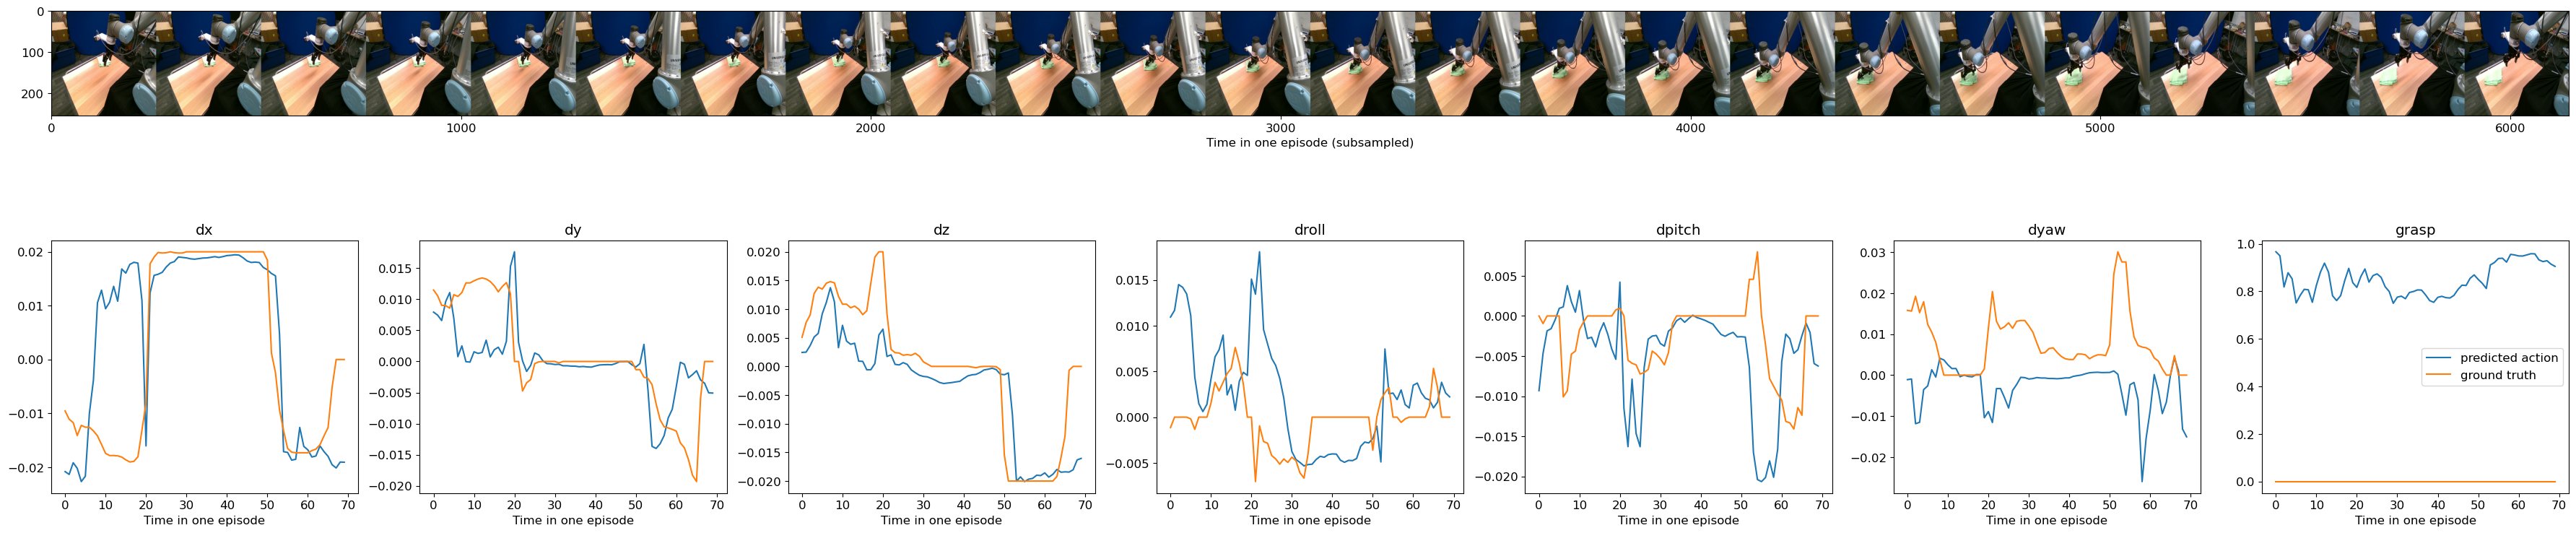

In [6]:
# run inference loop, this model only uses 3rd person image observations for bridge
# collect predicted and true actions
pred_actions, true_actions = [], []
for step in tqdm.trange(len(images) - (WINDOW_SIZE - 1)):
    input_images = np.stack(images[step:step+WINDOW_SIZE])[None]
    wrist_images = np.stack(hand_images[step:step+WINDOW_SIZE])[None]
    observation = {
        'image_primary': input_images,
        'image_wrist': wrist_images,
        'timestep_pad_mask': np.full((1, input_images.shape[1]), True, dtype=bool)
    }
    stat = model.dataset_statistics["berkeley_autolab_ur5"]["action"]
    # this returns *normalized* actions --> we need to unnormalize using the dataset statistics
    actions = model.sample_actions(observation, task, unnormalization_statistics=stat, rng=jax.random.PRNGKey(0))
    actions = actions[0] # remove batch dimension
    pred_actions.append(actions)
    final_window_step = step + WINDOW_SIZE - 1
    true_actions.append(np.concatenate((steps[final_window_step]['action']['world_vector'],steps[final_window_step]['action']['rotation_delta'],np.array(steps[final_window_step]['action']['gripper_closedness_action']).astype(np.float32)[None]), axis=-1))

print('\n\n\n\n DONE \n\n\n\n')

import matplotlib.pyplot as plt

ACTION_DIM_LABELS = ['dx', 'dy', 'dz', 'droll', 'dpitch', 'dyaw', 'grasp']

# build image strip to show above actions
img_strip = np.concatenate(np.array(images[::3]), axis=1)

# set up plt figure
figure_layout = [
    ['image'] * len(ACTION_DIM_LABELS),
    ACTION_DIM_LABELS
]
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplot_mosaic(figure_layout)
fig.set_size_inches([45, 10])

# plot actions
pred_actions = np.array(pred_actions).squeeze()
true_actions = np.array(true_actions).squeeze()
for action_dim, action_label in enumerate(ACTION_DIM_LABELS):
  # actions have batch, horizon, dim, in this example we just take the first action for simplicity
  axs[action_label].plot(pred_actions[:, 0, action_dim], label='predicted action')
  axs[action_label].plot(true_actions[:, action_dim], label='ground truth')
  axs[action_label].set_title(action_label)
  axs[action_label].set_xlabel('Time in one episode')

axs['image'].imshow(img_strip)
axs['image'].set_xlabel('Time in one episode (subsampled)')
plt.legend()
plt.savefig('action_predictions.png')